In [109]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5' 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [110]:
from google.colab import drive

fpath = '/content/drive/MyDrive/dataset3'
random_seed = 9

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['forward_look', 'close_look'] 

No. of categories =  2


In [111]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    TAMANO_IMG = 100
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.resize(img, (TAMANO_IMG, TAMANO_IMG))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = img.reshape(TAMANO_IMG, TAMANO_IMG, 1) 
            img_lst.append(np.array(img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  7264 
No. of labels loaded =  7264
<class 'list'> <class 'list'>


In [112]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (7264, 100, 100, 1) 
Labels shape =  (7264,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


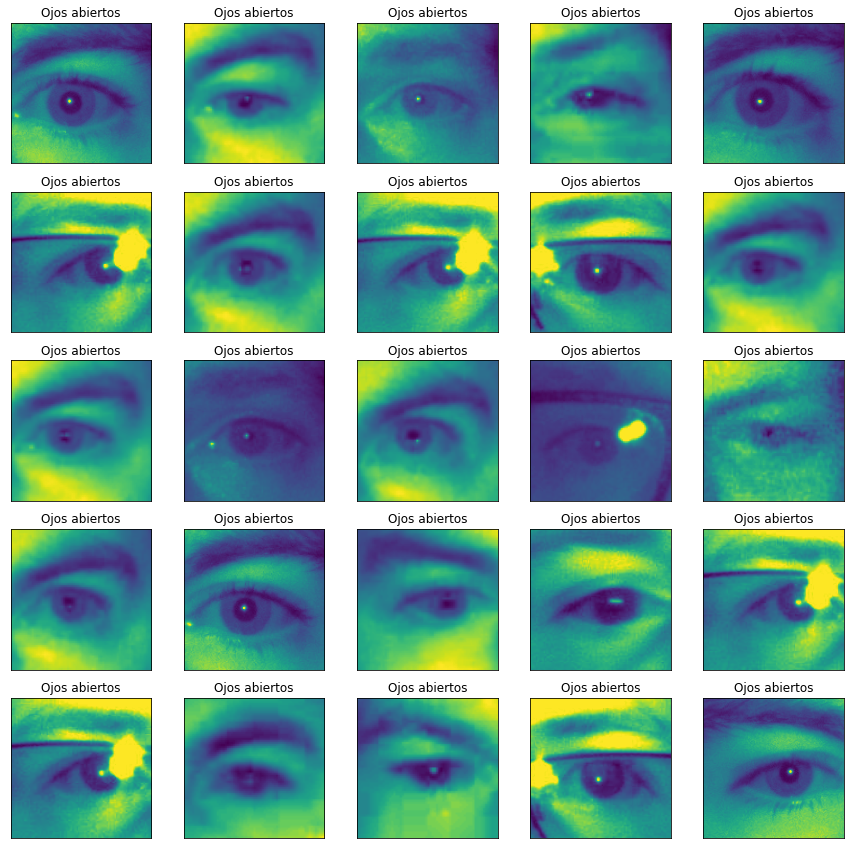

In [114]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/drive/MyDrive/dataset3/forward_look/'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.xticks([])
  plt.yticks([])
  plt.title('Ojos abiertos')
  plt.imshow(imagen, cmap='gray')
  plt.imshow(imagen)

Prepare data for training the CNN model

In [115]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 7261 7262 7263]

'n' values after shuffling =  [5302 1544 3008 ... 6782 4444  382]


In [116]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (7264, 100, 100, 1) 
Labels shape after shuffling =  (7264,)


In [117]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (7264, 100, 100, 1)


In [118]:
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("train_ds shape = ",train_ds.shape)
print("train_labels shape = ",train_labels.shape)
print("\ntest_ds shape = ",test_ds.shape)
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (5811, 100, 100, 1)
train_labels shape =  (5811,)

test_ds shape =  (1453, 100, 100, 1)
test_labels shape =  (1453,)


Define CNN model

In [119]:
modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

modeloCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [120]:
from tensorflow.keras.callbacks import TensorBoard

In [121]:
#La variable de tensorboard se envia en el arreglo de "callbacks" (hay otros tipos de callbacks soportados)
#En este caso guarda datos en la carpeta indicada en cada epoca, de manera que despues
#Tensorboard los lee para hacer graficas
tensorboardCNN = TensorBoard(log_dir='/content/logs/cnn')
history = modeloCNN.fit(train_ds, train_labels, batch_size=32,
                validation_split=0.15,
                epochs=10,
                callbacks=[tensorboardCNN])

Epoch 1/10
155/155 [==============================] - 85s 532ms/step - loss: 0.1762 - accuracy: 0.9271 - val_loss: 0.0466 - val_accuracy: 0.9874
Epoch 2/10
155/155 [==============================] - 78s 505ms/step - loss: 0.0540 - accuracy: 0.9830 - val_loss: 0.0423 - val_accuracy: 0.9851
Epoch 3/10
155/155 [==============================] - 81s 525ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0268 - val_accuracy: 0.9931
Epoch 4/10
155/155 [==============================] - 80s 519ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0375 - val_accuracy: 0.9862
Epoch 5/10
155/155 [==============================] - 80s 516ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0298 - val_accuracy: 0.9943
Epoch 6/10
155/155 [==============================] - 80s 517ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.0211 - val_accuracy: 0.9954
Epoch 7/10
155/155 [==============================] - 82s 530ms/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0467 - val_ac

In [126]:
_, acc = modeloCNN.evaluate(test_ds, test_labels, verbose=0)

print('> %.2f' % (acc * 100.0))

> 99.72


In [127]:
model_probs = modeloCNN.predict(test_ds, verbose=0)
# predict crisp classes for test set
model_classes = np.argmax(model_probs,axis=1)
# reduce to 1d array
model_probs = model_probs[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, model_classes)*100
# precision tp / (tp + fp)
precision = precision_score(test_labels, model_classes, average='weighted')*100
# recall: tp / (tp + fn)
recall = recall_score(test_labels, model_classes, average='weighted')*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

Accuracy: 47.97
F1 score: 31.10
Precision: 23.01
Recall: 47.97


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


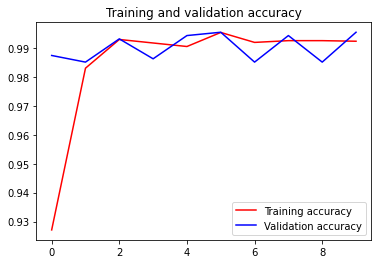

<Figure size 432x288 with 0 Axes>

In [125]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()